In [1]:
import numpy as np
from numpy import median
import pandas as pd
import pickle
import re

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import plotly
import plotly.express as px

### Cargamos nuestro Dataset final

In [2]:
fh = open('C:/Users/Mario Vegas/Desktop/BOOTCAMP DATA/PROYECTO FINAL/dataframe_final.pkl',"rb")
data= pickle.load(fh)
fh.close()

#### DIAGRAMA DE CAJA CON EL PRECIO Y LA MARCA PARA TODOS LOS MODELOS

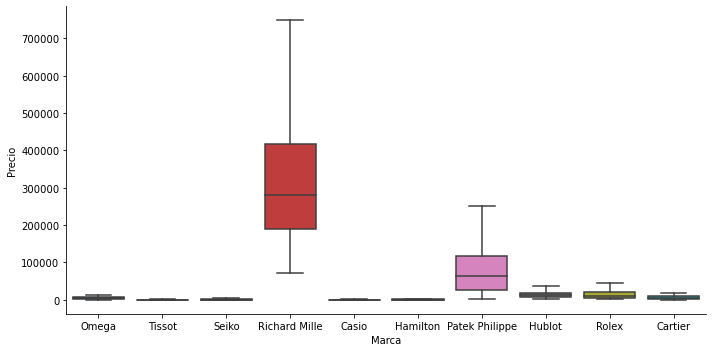

In [3]:
sns.catplot(x="Marca", y="Precio", kind="box", data=data, height = 5, aspect=2, showfliers = False)
plt.show()

* En este primer gráfico de caja, vemos como los relojes de la marca Richard Mille se salen completamente de la distribución del resto de relojes, lo que representa una fuente de claros outliers que van desde 1 millón de € de precio, hasta el reloj más caro de nuestro dataset que son 6.309.783€. Esto hace que el diagrama de caja esté totalmente disperso.
* No obstante, Patek Philippe también muestra un comportamiento que nos indica que su precio está ligado a relojes de alta gama.

#### DIAGRAMA DE CAJA CON EL PRECIO Y LA MARCA PARA LOS MODELOS DE MENOS DE 20.000€

In [4]:
data1 = data.query("Precio < 20000")

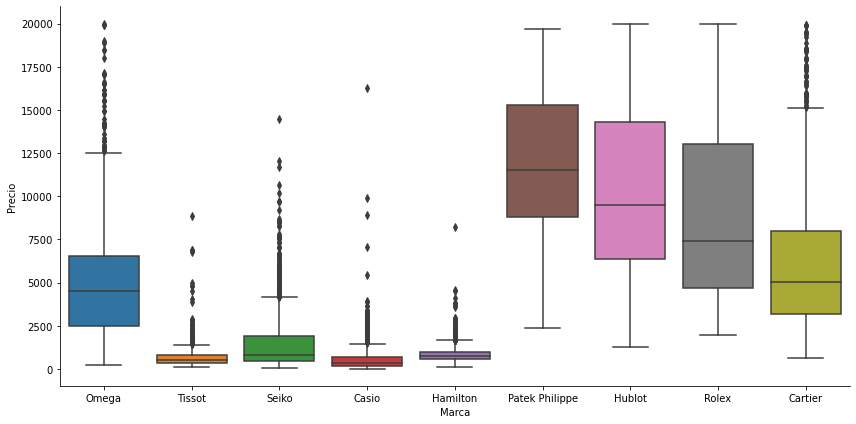

In [5]:
sns.catplot(x="Marca", y="Precio", kind="box", data=data1, height = 6, aspect=2)
plt.show()

* Para ver un diagrama de caja de form aún poco más intuitiva, hemos filtrado los relojes con un precio inferior a 20.000 €. Aquí sí que se puede observar que relojes como Hublot, Rolex o Patek Philippe tienden a un precio muy superior (observamos sus medianas), que el resto de relojes de gama baja como podrían ser Tissot, Seiko, Casio o Hamilton.
* Algo curioso es que Cartier y Omega tienen la mediana de sus precios en torno a los 5.000€, pero tienen en torno a un 5% de relojes por encima de los 30.000€.

#### HEATMAP

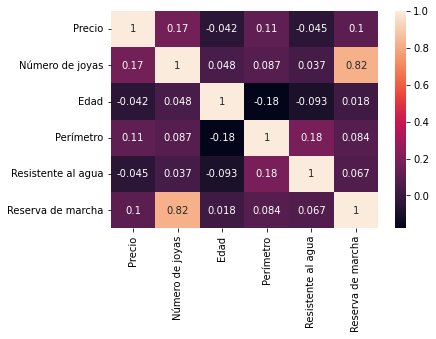

In [6]:
sns.heatmap(data[["Precio","Número de joyas","Edad", "Perímetro", "Resistente al agua", "Reserva de marcha"]].corr(),annot=True)
plt.show()

* En este mapa de calor vemos la correlación entre las variables numéricas. Las que más correlación tiene, un 82%, es la reserva de marcha con el número de joyas. Esto es debido a que prácticamente todos los relojes de cuarzo no tienen ninguna de las dos características, por lo que podemos concluir que están muy correlacionadas.
* Respecto al número de joyas con el precio, a priori se podría pensar que están muy correlacionadas pero vemos que sólo en un 17%.
* El resto de variables no muestran mucha correlación, ya que las características que rodea a cada una son muy distintas. Podemos pensar que la Edad de un reloj, no va a tener mucha correlación con su perímetro. O por ejemplo la resistencia al agua con la reserva de marcha.

#### GRÁFICO DE DE BARRAS PARA CADA MARCA Y PRECIO EN FUNCIÓN DE SU DISPONIBILIDAD

In [7]:
data1 = data.query("Precio < 20000")

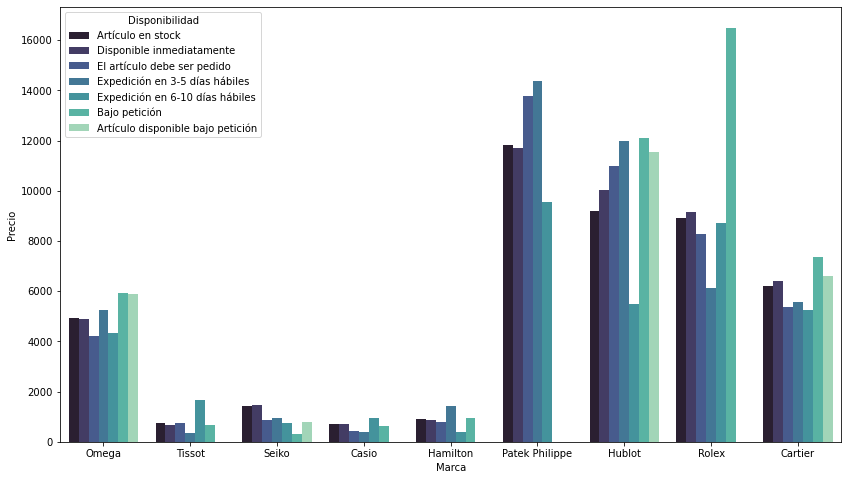

In [8]:
fig, ax = plt.subplots(figsize=(14,8))
sns.barplot(x="Marca", y="Precio", hue="Disponibilidad", data=data1, palette="mako", ci=None)
plt.show()

* En este gráfico vemos la  distribución de la disponiblidad de cada reloj por marca, para aquellos relojes que cuestan menos de 20.000 €. En Rolex, podemos observar que los relojes que están sujetos a petición incluyen los más caros.
* Para las marcas, digamos de baja gama, como pueden ser Tissot, Seiko, Casio o Hamilton, la mayoría de sus relojes están en stock o con una disponibilidad inmediata, cosa que podemos suponercomo lógica.
* Omega y Cartier son las marcas que más continua tienen la distribución de sus relojes en función de su disponiblidad.


#### GRÁFICO DE DE BARRAS PARA CADA MARCA Y PRECIO EN FUNCIÓN DE SU DISPONIBILIDAD (PRECIO SUPERIOR A 900.000€)

In [9]:
data2 = data.query("Precio > 900000")

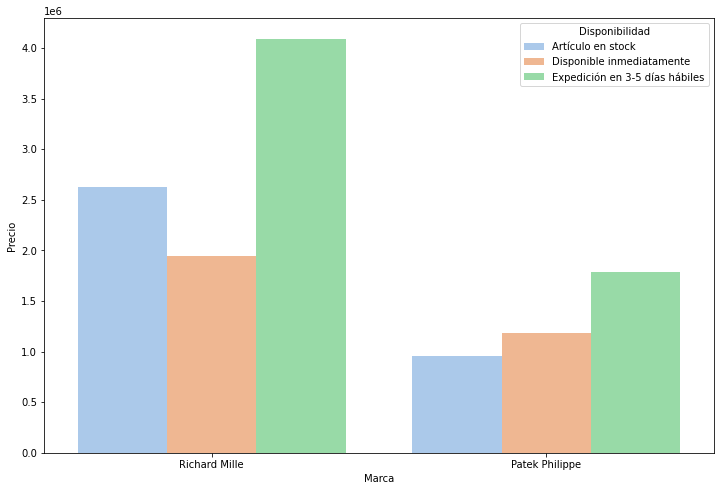

In [10]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x="Marca", y="Precio", hue="Disponibilidad", data=data2, palette="pastel", ci =None)
plt.show()

* Respecto a los relojes de alta gama, los que cuestan más de 900.000€, llama la atención que o bien están en stock o disponibles inmediatamente (nunca un envío superior a 5 días hábiles). Esto nos puede llevar a la conclusión de que gran parte de estos relojes están destinados a un público mayoritariamente de tipo inversionista y lo que hacen es comerciar con ellos de mánera rápida y efectiva.

#### COUNTPLOT POR GÉNERO

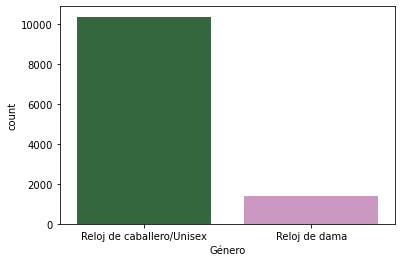

In [11]:
sns.countplot(x='Género', data=data, palette="cubehelix",)
plt.show()

* Algo interesante es la distribución por género. De los 11.771 relojes de los que se disponen datos, tan sólo el 12% responden a características propias de mujer, casi 10.400 registros son relojes más orientados al género masculino

#### DIAGRAMA DE VIOLÍN POR GÉNERO (RELOJES MENORES DE 100.000€)

In [12]:
data3 = data.query("Precio < 100000")

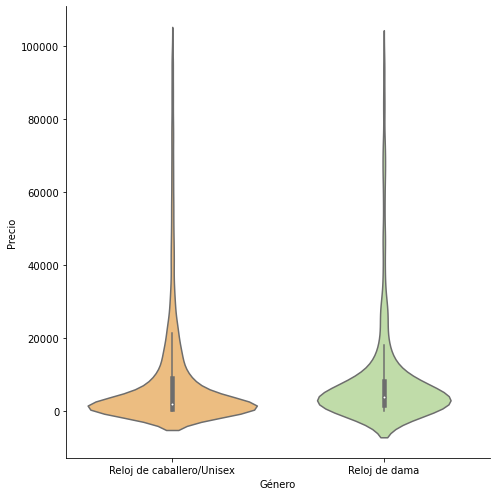

In [13]:
sns.catplot(x='Género', y='Precio', kind='violin', data=data3, palette="Spectral", height = 7, aspect =1)
plt.show()

* Sin embargo, podemos ver que la mediana de los relojes femeninos es superior a la de los masculinos. Esto puede ser debido a que, por ejemplo, los relojes de Cartier cuya media ronda los 27.000€, son una marca de reloj que suelen consumir mujeres.

#### HISTOGRAMA DEL PRECIO

In [14]:
data3 = data3.reset_index()

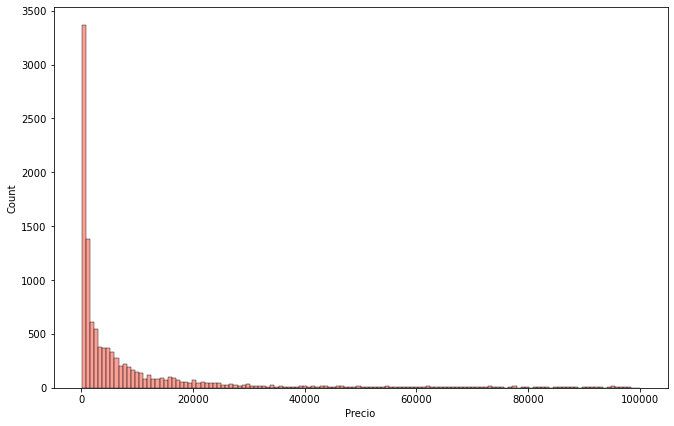

In [15]:
fig= plt.figure(figsize=(11,7))
sns.histplot(data=data3,x="Precio",color="salmon" )
plt.show()

* En este histograma, con los relojes de menos de 100.000€ de valor, vemos claramente la distribución y como la mayoría de nuestros datos (80%), están por debajo de los 20.000€. A partir de esa cifra, los percentiles tienen cada vez mucha más distancia.

#### SCATTER PLOT DEL NÚMERO DE JOYAS Y RESERVA DE MARCHA EN FUNCIÓN DEL TIPO DE CALIBRE

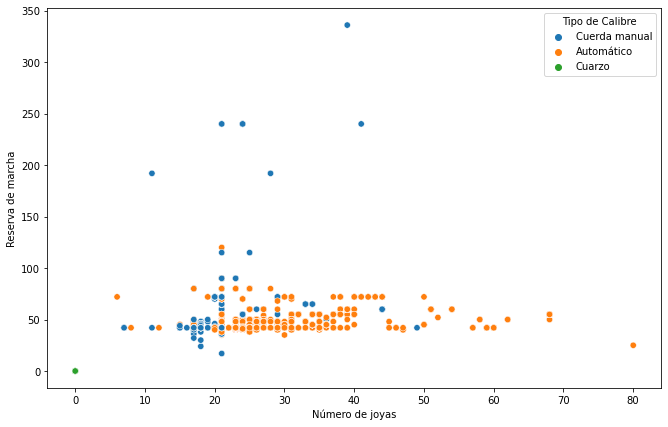

In [16]:
fig= plt.figure(figsize=(11,7))
sns.scatterplot(data=data, x="Número de joyas", y="Reserva de marcha", hue="Tipo de Calibre", s=40)
plt.show()

* En este scatter plot podemos ver claramente la relación entre la Reserva de marcha (autonomía del reloj) y el número de joyas en función de su calibre. Vemos que la mayoría de relojes Automáticos tienen una alta correlación entre ambas variables y los relojes de Cuarzo no disponen en sus funcionalidades de ninguna de las dos características.

#### DIAGRAMA DE CAJA DEL CONTENIDO DE LA ENTREGA Y SU PRECIO

<Figure size 1440x1296 with 0 Axes>

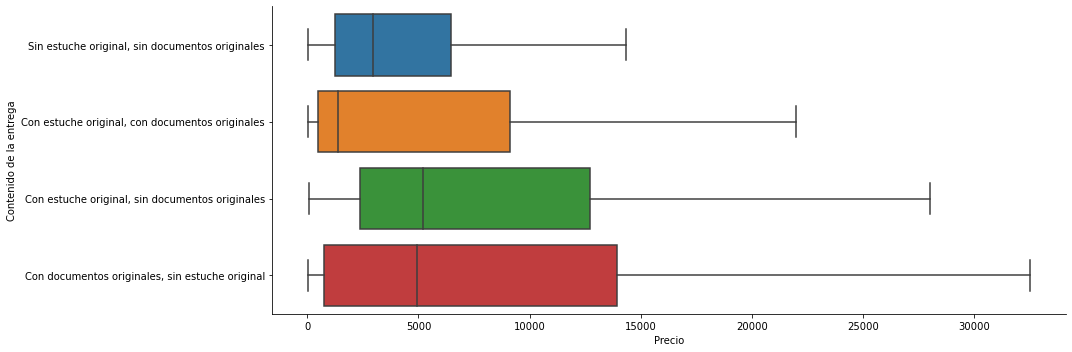

In [17]:
fig= plt.figure(figsize=(20,18))
sns.catplot(x='Precio', y='Contenido de la entrega', kind='box', legend_out=True, data=data3, showfliers=False, height = 5, aspect=3)
plt.show()

* Respecto al análisis de los objetos que vienen contenidos en la entrega del reloj, los relojes que tienen tanto el estuche original como los documentos originales que acrediten la autenticidad del reloj, curiosamente son los que tienen la mediana más pequeña. Esto nos puede llevar a pensar que la mayoría de relojes de "baja" gama, como Tissot, Hamilton o Casio son más nuevos y tienen todos los documentos. 
* Sin embargo relojes como Rolex, Cartier o Patek Philippe son más antiguos y puede que, por ejemplo, como podemos observar en la gráfica, estos hayan perdido su estuche original.
* Los relojes que no tienen ni estuche original ni documentos, en ningún caso superan los 14.000€ de precio.

#### DIAGRAMA DE BARRAS DE LA MARCA Y EL PRECIO EN FUNCIÓN DEL ESTADO

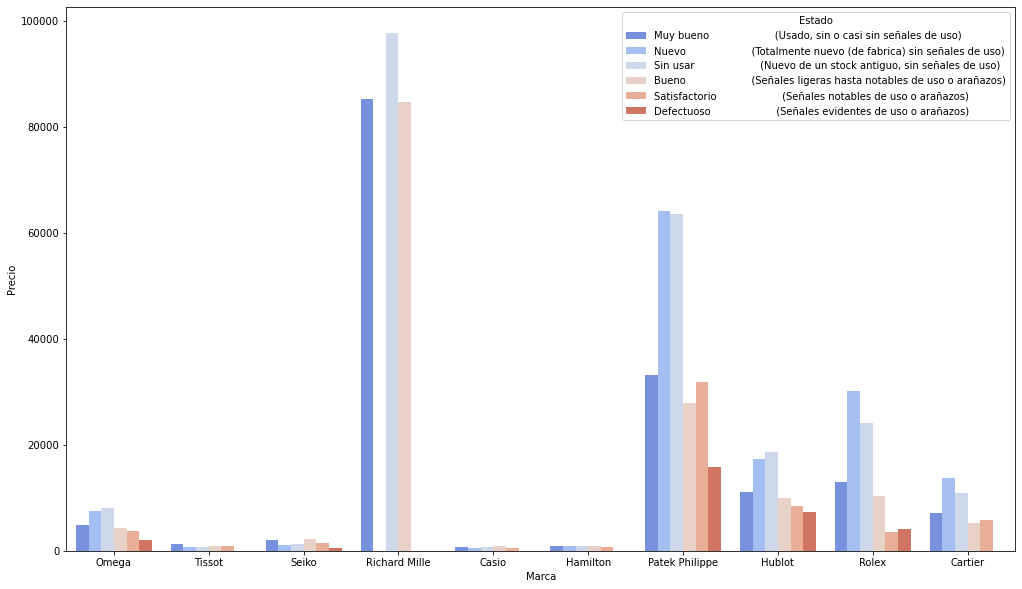

In [18]:
fig, ax = plt.subplots(figsize=(17,10))  
sns.barplot(x="Marca", y="Precio", hue="Estado", data=data3, palette="coolwarm", ci=None)
plt.show()

* Finalmente vemos como para casi todas las marcas, los relojes más caros dentro de su gama son los que están sin usar o nuevos (cosa lógica).
* Los relojes defectuosos (con señales evidentes de uso o arañazos), en todas las marcas son los que menos precio tienen.
* Richard Mille, la marca más cara, no tiene ningún reloj satisfactorio o defectuoso, las dos características que más demuestran el uso de un reloj.

#### DIAGRAMA DE CAJA SIN PATEK PHILIPPE Y RICHARD MILLE

In [19]:
data4 = data.query("Marca != 'Richard Mille' & Marca!= 'Patek Philippe' & Precio <100000")

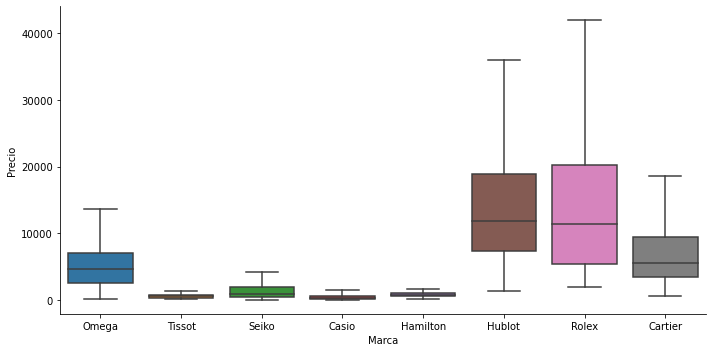

In [20]:
sns.catplot(x="Marca", y="Precio", kind="box", data=data4, height = 5, aspect=2, showfliers = False)
plt.show()

#### DIAGRAMA DE BARRAS CON EL MATERIAL DE LA CAJA Y SU PRECIO

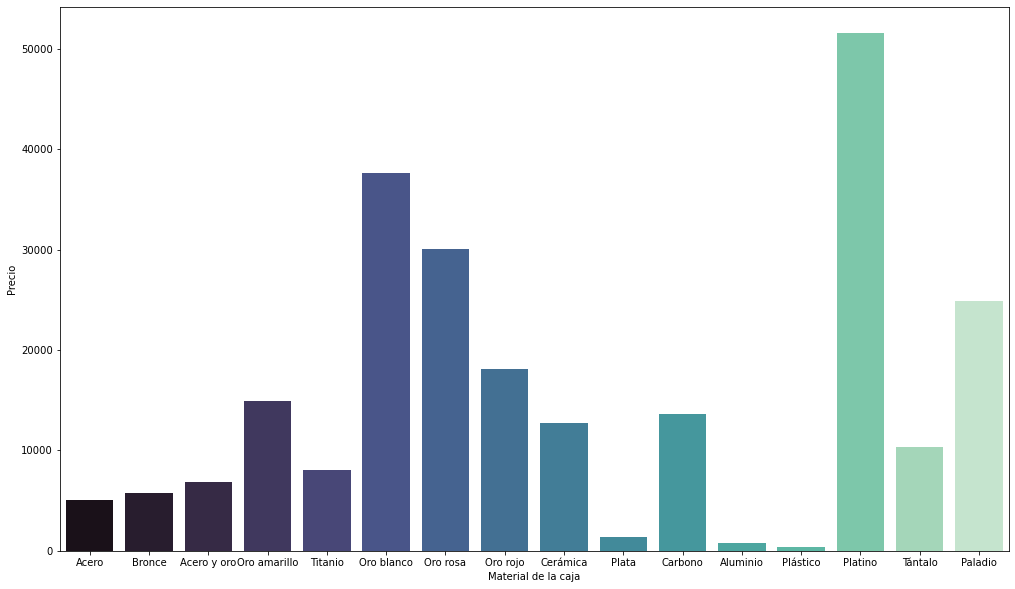

In [21]:
fig, ax = plt.subplots(figsize=(17,10))  
sns.barplot(x="Material de la caja", y="Precio", data=data3, palette="mako", ci=None)
plt.show()

#### DIAGRAMA DE CAJA SÓLO CON RICHARD MILLE Y PATEK PHILIPPE

In [22]:
data5 = data.query("Marca == 'Richard Mille' | Marca == 'Patek Philippe'")

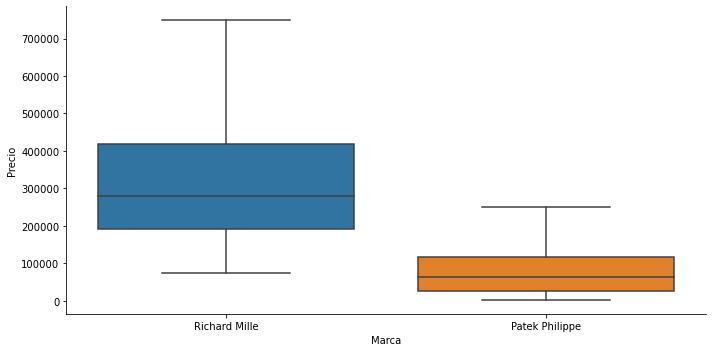

In [23]:
sns.catplot(x="Marca", y="Precio", kind="box", data=data5, height = 5, aspect=2, showfliers = False)
plt.show()